# Amazon Fine Food Reviews

Based on Amazon customer reviews, analysis of the sentiment score obtained from dataset and comparing them with star ratings

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [56]:
#Read data
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')


In [57]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [58]:
df.shape

(568454, 10)

# **EDA**

Exploratoray Data Analysis

In [59]:
score = df['Score'].value_counts()  #total ratings

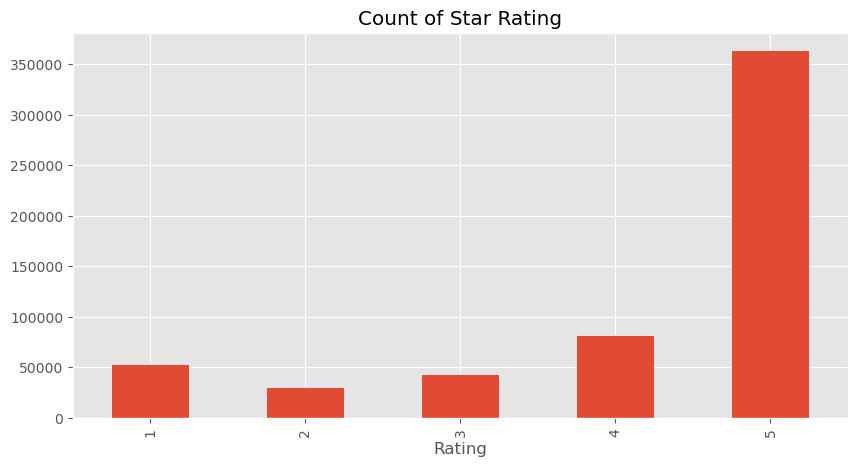

In [60]:
#barplot representation
axis = score.sort_index().plot(kind = 'bar', 
                               title = 'Count of Star Rating',
                              figsize= (10,5))
axis.set_xlabel('Rating')
plt.show()

In [61]:
#basic nltk

example = df['Text'][102]
print(example)

The crust on these tarts are perfect.  My husband loves these, but I'm not so crazy about them.  They are just too sour/tart for my taste.  I'll eat the crust and hubby takes my filling.  My kids think they're great, so maybe it's just me.


In [62]:
tokens= nltk.word_tokenize(example)
tokens[:20]

['The',
 'crust',
 'on',
 'these',
 'tarts',
 'are',
 'perfect',
 '.',
 'My',
 'husband',
 'loves',
 'these',
 ',',
 'but',
 'I',
 "'m",
 'not',
 'so',
 'crazy',
 'about']

In [63]:
tagged = nltk.pos_tag(tokens)
tagged[:20]

[('The', 'DT'),
 ('crust', 'NN'),
 ('on', 'IN'),
 ('these', 'DT'),
 ('tarts', 'NNS'),
 ('are', 'VBP'),
 ('perfect', 'JJ'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('husband', 'NN'),
 ('loves', 'VBZ'),
 ('these', 'DT'),
 (',', ','),
 ('but', 'CC'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('not', 'RB'),
 ('so', 'RB'),
 ('crazy', 'JJ'),
 ('about', 'IN')]

In [64]:
group = nltk.chunk.ne_chunk(tagged) #chunks the text
group.pprint()

(S
  The/DT
  crust/NN
  on/IN
  these/DT
  tarts/NNS
  are/VBP
  perfect/JJ
  ./.
  My/PRP$
  husband/NN
  loves/VBZ
  these/DT
  ,/,
  but/CC
  I/PRP
  'm/VBP
  not/RB
  so/RB
  crazy/JJ
  about/IN
  them/PRP
  ./.
  They/PRP
  are/VBP
  just/RB
  too/RB
  sour/tart/JJ
  for/IN
  my/PRP$
  taste/NN
  ./.
  I/PRP
  'll/MD
  eat/VB
  the/DT
  crust/NN
  and/CC
  hubby/NN
  takes/VBZ
  my/PRP$
  filling/NN
  ./.
  My/PRP$
  kids/NNS
  think/VBP
  they/PRP
  're/VBP
  great/JJ
  ,/,
  so/RB
  maybe/RB
  it/PRP
  's/VBZ
  just/RB
  me/PRP
  ./.)


# **VADER SENTIMENT SCORE ANALYSIS**
This approach takes all the words in sentence and returns the positve/negative/neutral value, combines up to give the sentiment of the statement and removes stop words like 'and','the','a', etc as they don't include any sentiment.

NOTE: The sentiment relating to any relationship between objects can differ as nltk is not equivalent to human speech.

In [65]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [66]:
sia.polarity_scores('I am living positive life.')

{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.5574}

In [67]:
sia.polarity_scores('Life was sad earlier.')

{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

In [68]:
sia.polarity_scores(example)  #from above chosen review#

{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.9287}

In [69]:
#Run the polarity score on the entire dataset
res={} #to store the score
for i,row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [70]:
res #checking the result

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.079, 'neu': 0.853, 'pos': 0.068, 'compound': -0.1027},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},

In [72]:
#storing this result in pandas dataframe for better view
vaders = pd.DataFrame(res).T # the '.T' flips the dataframe horizontally 
vaders = vaders.reset_index().rename(columns= {'index':'Id'}) # renaming the index
vaders = vaders.merge(df, how='left') # merging the obtained data with the original

In [75]:
vaders.head() #sentiment meta data

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


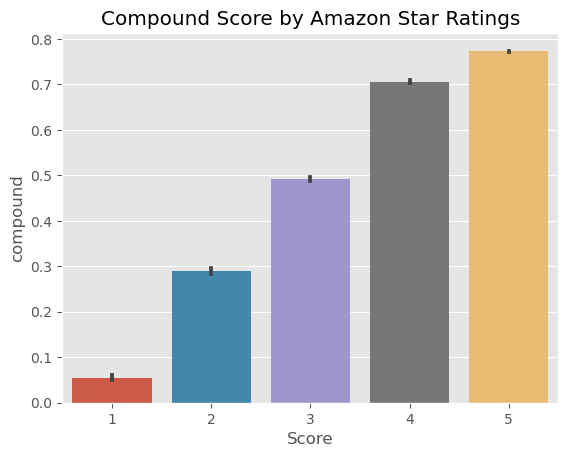

In [76]:
#Let's check if the ratings and sentiment scores match
#using bar plot
ax = sns.barplot(data= vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Ratings')
plt.show()

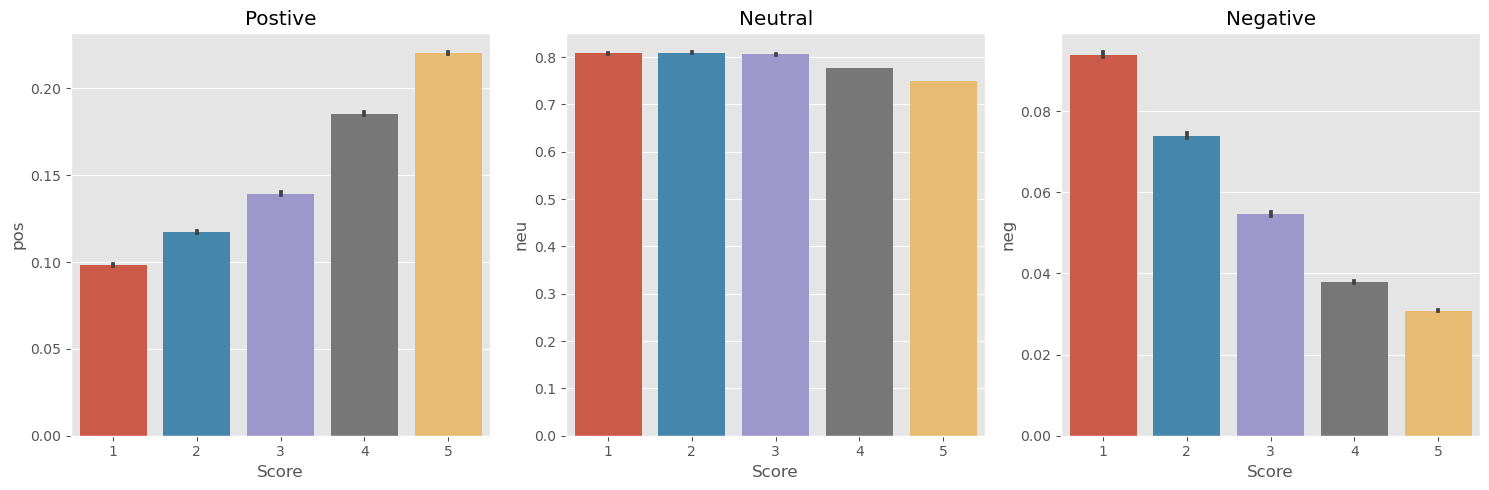

In [79]:
#To check the sentiment types for each star rating
#using matplotlib for subplots
fig, axs = plt.subplots(1,3,figsize= (15,5))
#defining the plots
sns.barplot(data=vaders, x='Score',y='pos', ax = axs[0])
sns.barplot(data=vaders, x='Score',y='neu', ax = axs[1])
sns.barplot(data=vaders, x='Score',y='neg', ax = axs[2])
axs[0].set_title('Postive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

As we hypothesized, the highest star rating (5) received the most positive scores, while the lowest star rating (1) received the most negative scores. This is evident in the plots, which show that the positive score increases from star rating 1 to 5, with star rating 5 having the highest positive score. Similarly, the negative score decreases from star rating 1 to 5, with star rating 5 having the lowest negative score.